In [2]:
import skimage
from skimage import io
from skimage import color
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv #pip install opencv-contrib-python

In [3]:
rocky = io.imread('C:\\Users\\User\\Downloads\\rocky.jpg')

In [3]:
rocky

array([[[ 10,  15,  21],
        [ 10,  15,  21],
        [  9,  14,  20],
        ...,
        [ 35,  19,  22],
        [ 37,  18,  22],
        [ 37,  18,  22]],

       [[ 10,  15,  21],
        [ 10,  15,  21],
        [  9,  14,  20],
        ...,
        [ 36,  20,  23],
        [ 38,  19,  23],
        [ 38,  19,  23]],

       [[ 10,  15,  21],
        [  9,  14,  20],
        [  9,  14,  20],
        ...,
        [ 38,  19,  21],
        [ 38,  19,  21],
        [ 38,  19,  21]],

       ...,

       [[136,  73,  66],
        [128,  65,  60],
        [121,  58,  53],
        ...,
        [ 52,  21,  26],
        [ 54,  22,  25],
        [ 54,  22,  25]],

       [[139,  76,  69],
        [133,  70,  65],
        [126,  63,  58],
        ...,
        [ 49,  18,  23],
        [ 51,  19,  24],
        [ 51,  19,  24]],

       [[139,  76,  69],
        [133,  70,  65],
        [126,  63,  58],
        ...,
        [ 49,  18,  23],
        [ 51,  19,  24],
        [ 51,  19,  24]]

In [8]:
rocky.shape

(778, 594, 3)

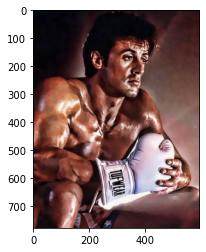

In [12]:
plt.imshow(rocky)

**EP2.1**

**Primeira função: RGB2Gray**

In [5]:
#Criada por nós
def rgb2cinza(img):
    return np.dot(img[...,:3], [0.2125, 0.7154, 0.0721])

#Usada diretamente do Skimage: rgb2gray

In [6]:
rocky_cinza = rgb2cinza(rocky)
rocky_gray = color.rgb2gray(rocky)
rocky_cinza.shape

(778, 594)

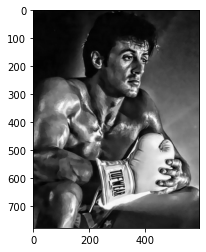

In [14]:
plt.imshow(rocky_cinza, cmap=plt.get_cmap('gray'))

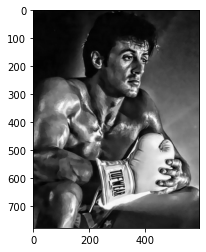

In [10]:
plt.imshow(rocky_gray, cmap=plt.get_cmap('gray'))

**Segunda função: Soma de Fundo com gradiente de níveis de cinza**

In [6]:
x = np.linspace(0, 1, rocky_gray.shape[0])
grad = np.tile(x, (rocky_gray.shape[1], 1)).T

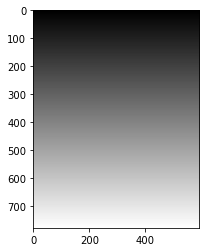

In [7]:
plt.imshow(grad, cmap=plt.get_cmap('gray'))

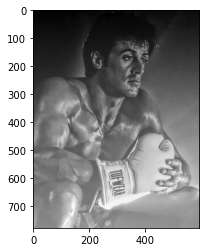

In [8]:
grad_rocky = rocky_gray + grad
plt.imshow(grad_rocky, cmap=plt.get_cmap('gray'))

**Terceira função: Log da Imagem**
1. Reescalar imagem para valores dos pixels ficarem entre 0 e 1.
2. Aplicar função O = gain\*log(1+I). (O=output, I=input)

In [5]:
rocky_cinza

array([[14.3701, 14.3701, 13.3701, ..., 22.6163, 22.3259, 22.3259],
       [14.3701, 14.3701, 13.3701, ..., 23.6163, 23.3259, 23.3259],
       [14.3701, 13.3701, 13.3701, ..., 23.1817, 23.1817, 23.1817],
       ...,
       [85.8828, 78.027 , 71.027 , ..., 27.948 , 29.0163, 29.0163],
       [88.8828, 83.027 , 76.027 , ..., 24.948 , 26.1605, 26.1605],
       [88.8828, 83.027 , 76.027 , ..., 24.948 , 26.1605, 26.1605]])

In [11]:
#Criada por nós
def log_im(img):
    #1.
    img_esc = img/255
    #2.
    gain = 1
    img_log = gain*np.log(1+img)
    return img_log

#Usada diretamente de Skimage: exposure.adjust_log

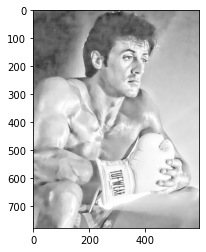

In [12]:
rocky_log = log_im(rocky_cinza)
rocky_adjlog = exposure.adjust_log(rocky_cinza)
plt.imshow(rocky_log, cmap=plt.get_cmap('gray'))

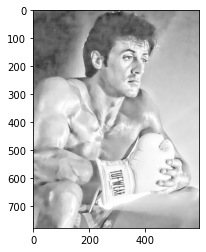

In [13]:
plt.imshow(rocky_adjlog, cmap=plt.get_cmap('gray'))

**Quarta função: Exp da Imagem**

In [18]:
#Podemos variar gamma, pra menor que 1 ou maior. Como escolher?
rocky_exp = exposure.adjust_gamma(rocky_gray, 2)

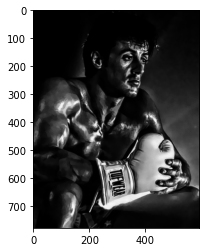

In [19]:
plt.imshow(rocky_exp, cmap=plt.get_cmap('gray'))

**Quinta função: Filtro da média implementado usando convolução**

In [11]:
kernel = np.ones((10, 10), np.float32)/100
rocky_blur = cv.filter2D(rocky_gray, -1, kernel)

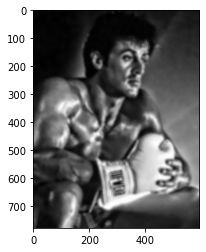

In [12]:
plt.imshow(rocky_blur, cmap=plt.get_cmap('gray'))

**EP2.2**

A normalização das imagens deve ser feita por equalização de histogramas, e as imagens normalizadas formarão o normalizedDataset.

In [13]:
#Criada por nós
def hist_eq(img, bins):
    img_hist, bin_edges = np.histogram(img.flatten(), bins, density=True)
    cdf = img_hist.cumsum() #Cumulative Distribution Function; a função que equaliza os pixels.
    cdf = 255 * cdf/cdf[-1] #Normalização
    
    #Usar interpolação linear da CDF para achar novos valores pros pixels
    img_n = np.interp(img.flatten(), bin_edges[:-1], cdf)
    return img_n.reshape(img.shape), cdf

#Usada diretamente de Skimage: equalize_hist

In [14]:
rocky_norm, cdf = hist_eq(rocky_cinza, 256)
rocky_eqhist = exposure.equalize_hist(rocky_gray, nbins=256)

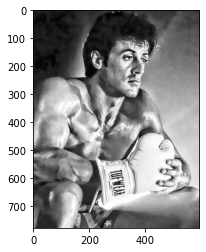

In [15]:
plt.imshow(rocky_norm, cmap=plt.get_cmap('gray'))

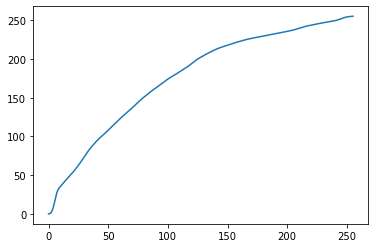

In [16]:
plt.plot(cdf)

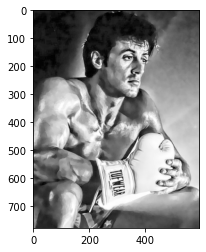

In [17]:
plt.imshow(rocky_eqhist, cmap=plt.get_cmap('gray'))

Calcular para os datasets originalGrayDataset, augumentedDataset e normalizedDataset,
1. Protótipo médio de cada classe.
       Somar todas imagens de uma classe, todas variações, e dividir pelo número de imagens.

2. Histograma médio de cada classe.
3. Variância do histograma de cada classe.

1. Protótipo médio de cada classe.

2. Histograma médio de cada classe.

In [18]:
#Histograma de uma imagem
hist_img, hist_centers = exposure.histogram(rocky_eqhist, nbins=256)

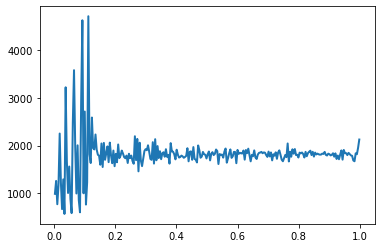

In [19]:
plt.plot(hist_centers, hist_img, lw=2)

3. Variância do histograma de cada classe.

In [ ]:
#primeiro temos uma variável com o histograma médio de cada classe, vamos supor hist_medio
#então fazemos
bin_centro = 0.5*(hist_centers[1:] + hist_centers[:-1])
#agora temos que fazer um loop, com todas imagens de uma classe
loop
    var = np.average((bin_centro - hist_medio)**2) #var deve ser um array, porque vamos ter uma variância pra cada bin